

# **KNN**





*   KNN can be used for both classsification and regression task.

*   KNN is a non linear model.

*   KNN is also called lazy algorithm.

*   KNN is uses similarity or distance calculation for classification and regression.(Euclidean/Manhattan)

*   KNN is computationally very expensive.

*   KNN is very easy to implement and interpret.
.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_excel('/content/diabetes dataset.xlsx')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Apart from outliers, important thing to observe here is min value which is 0, this cant be 0 for glucose level, blood pressure, insulin, skin thickness, and BMI. This is wrong data
#Lets replace 0 with NaN first and then see how to impute 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#There is no other null values, lets replace 0 with Nan

df.loc[:,'Glucose':'BMI'] = df.loc[:, 'Glucose':'BMI'].replace(0, np.nan)


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

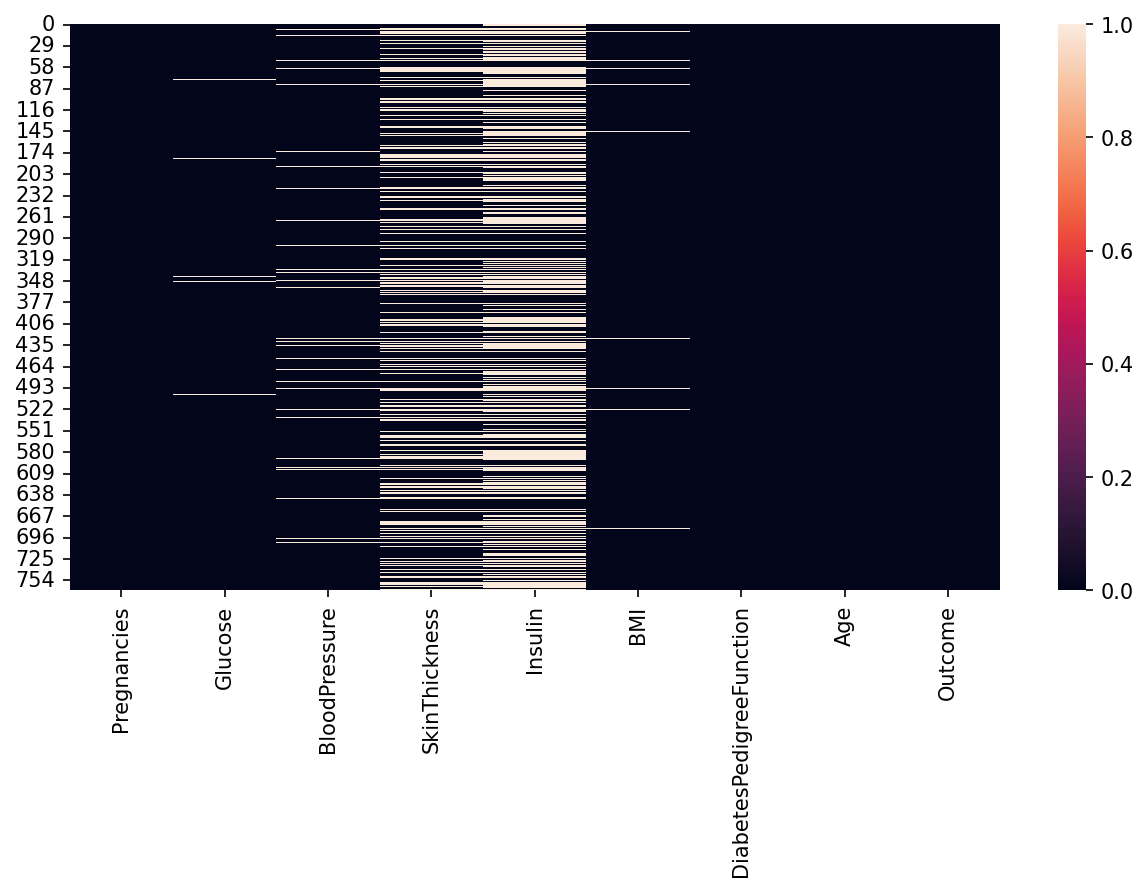

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150

sns.heatmap(df.isna())

In [ ]:
# Now let plot histogram and check how to impute, Mean or Median
# Mean imputation= if data is normally distributed
# Meadian imputation = if skewed

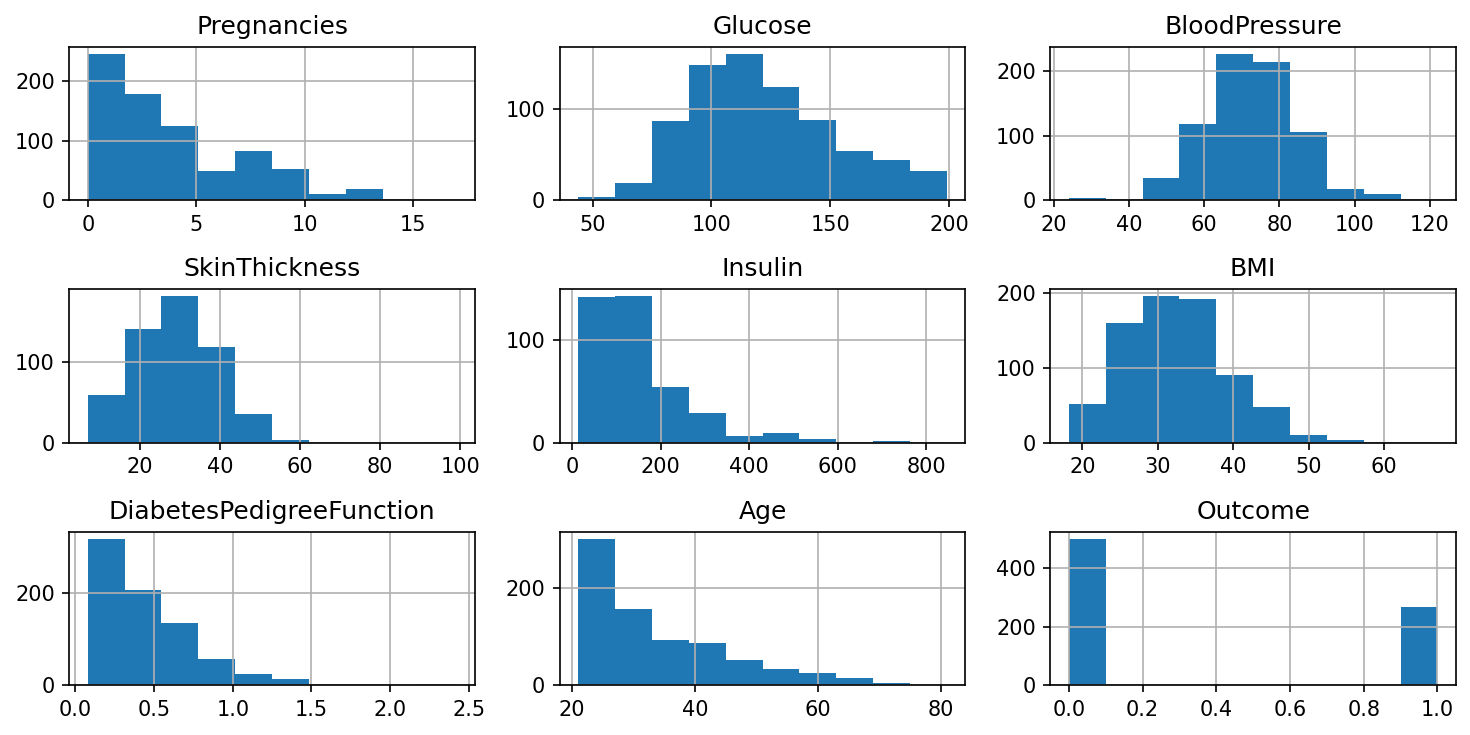

In [ ]:
df.hist()
plt.tight_layout()

Every column with null values seems to be positively skewed, so we can impute with median

In [ ]:
#Using simple imputes to impute all the values together

from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='median')                                          #always assign the class into a object



In [ ]:
df.loc[:,'Glucose':'BMI'] = si.fit_transform(df.loc[:, 'Glucose':'BMI'])         #here fit calcute the values to be tranformed as median, transform replaces with median values 

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Feature Scaling**

Note:

*   For any alogrithm that  involves distance calculation, feature scaling is mandatory


*   Never  perform feature scaling on target column





In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
X = sc.fit_transform(X)      #perform feature scaling only on independent columns
X

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.20,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()                        #seleted k=5 by default

In [ ]:
knn.fit(xtrain,ytrain)       #here we use only fit cuz we want the alogrithm to to only calculate and not perform any changes/transformation in data
ypred = knn.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, roc_auc_score, accuracy_score

In [ ]:
confusion_matrix(ytest,ypred)

array([[86, 13],
       [18, 37]])

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        99
           1       0.74      0.67      0.70        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



In [ ]:
 #training accuracy

print(knn.score(xtrain,ytrain))

0.8192182410423453


In [ ]:
#testing accuracy

print(knn.score(xtest,ytest))

0.7987012987012987


**Selecting best value for K**

In [ ]:
#### for list creation using for loop
### just for study example

lst = [1,2,3,4,5,6,7,8,9]
lst

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
list = []
for i in range(1,10):
  print(i)
  list.append(i)

1
2
3
4
5
6
7
8
9


In [ ]:
list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
trainac = []
testac =[]

for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(xtrain,ytrain)
  ypred = knn.predict(xtest)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))


Text(0, 0.5, 'Accuracy')

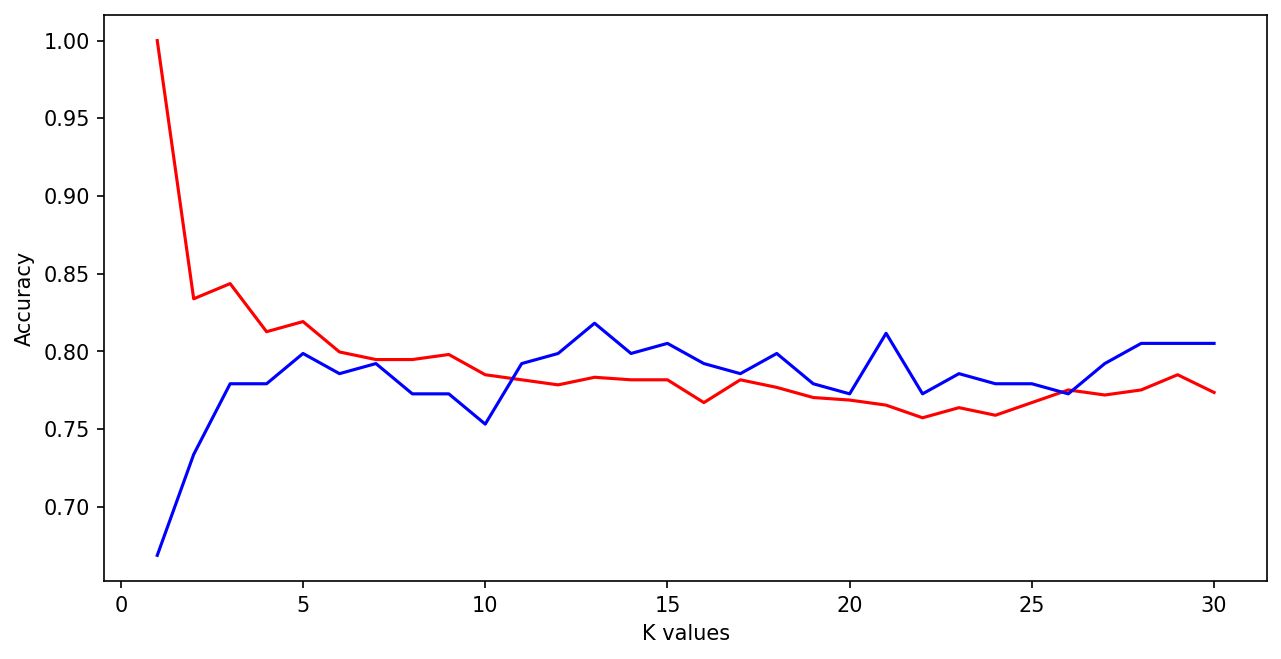

In [ ]:
plt.plot(range(1,31), trainac, color ='r' )
plt.plot(range(1,31), testac, color ='b' )

plt.xlabel('K values')
plt.ylabel('Accuracy')



*   Look for the intersection point which is depicting that at this k value, testing accuracy and training accuracy is equal at this point
*   As per the above intersection is the at k around 11 and around 26. Lets check



In [ ]:
## when k = 11

knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))    

0.7817589576547231
0.7922077922077922


In [ ]:
## when k = 26

knn = KNeighborsClassifier(n_neighbors= 26)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))   

0.7752442996742671
0.7727272727272727




*   Now we see that, when k is 26, the model is a genralised model
*   (i.e), training accuracy = testing accuracy, there is no overfitting or underfitting 

